In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt  
import seaborn as sns  
from statsmodels.tsa.seasonal import seasonal_decompose 
from scipy import stats
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

In [2]:
df = pd.read_csv("C:/Users/adrij/Downloads/Gold Data.csv")

In [3]:
print(df.shape)
print(df.head(200))
print(df.isnull().values.any())

(3706, 5)
           Date    Close     Open     High      Low
0    01-01-2008  113.052  113.402  113.699  112.377
1    02-01-2008  116.020  114.252  116.681  114.252
2    03-01-2008  117.247  117.072  117.760  115.628
3    04-01-2008  116.789  116.708  117.612  115.615
4    07-01-2008  116.289  116.721  117.072  115.817
..          ...      ...      ...      ...      ...
195  30-09-2008  115.556  118.180  118.403  114.795
196  01-10-2008  116.409  114.690  117.904  114.611
197  02-10-2008  110.767  114.637  114.795  109.350
198  03-10-2008  109.311  110.859  111.869  107.907
199  06-10-2008  113.640  112.827  115.320  112.355

[200 rows x 5 columns]
False


In [4]:
gold=df[['Date','Close']]
gold.head(200)

,Date,Close
0,01-01-2008,113.052
1,02-01-2008,116.020
2,03-01-2008,117.247
3,04-01-2008,116.789
4,07-01-2008,116.289
...,...,...
195,30-09-2008,115.556
196,01-10-2008,116.409
197,02-10-2008,110.767
198,03-10-2008,109.311


In [5]:
gold.index = pd.to_datetime(gold['Date'], format='%d-%m-%Y')

In [6]:
gold.describe()

,Close
count,3706.000000
mean,166.090737
std,30.112189
min,92.435000
25%,147.727925
50%,159.806800
75%,194.416125
max,241.734000


<Axes: title={'center': 'Closing Gold Prices from 2008 to 2022'}, xlabel='Date', ylabel='Closing Prices'>

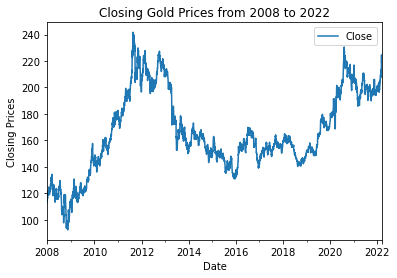

In [7]:
gold.plot(ylabel="Closing Prices",title="Closing Gold Prices from 2008 to 2022")

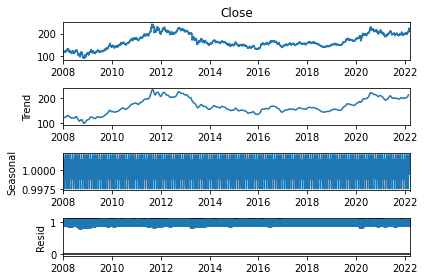

In [8]:
ts_decomposition = seasonal_decompose(x=gold.Close, model='multiplicative',period=24)
ts_decomposition.plot()
plt.show()

<Axes: >

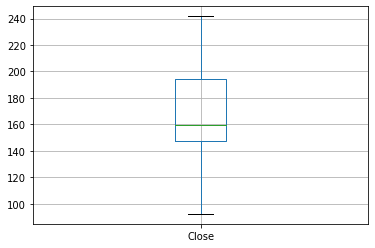

In [9]:
gold.boxplot(column=["Close"])

In [10]:
z = np.abs(stats.zscore(gold['Close']))
print(np. count_nonzero(abs(z) >3 ))

0


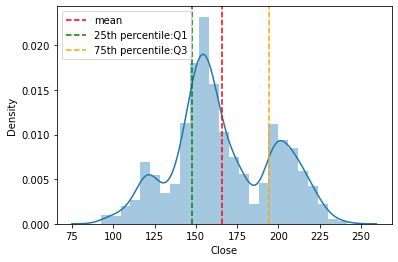

In [11]:
sns.distplot(gold['Close'])
plt.axvline(x=np.mean(gold['Close']), c='red', ls='--', label='mean')
plt.axvline(x=np.percentile(gold['Close'],25),c='green', ls='--', label = '25th percentile:Q1')
plt.axvline(x=np.percentile(gold['Close'],75),c='orange', ls='--',label = '75th percentile:Q3' )
plt.legend()

In [12]:
stationarity = adfuller(gold['Close'])
print('ADF Statistic: %f' % stationarity[0])
print('p-value: %f' % stationarity[1])
print('Critical Values:')
for key, value in stationarity[4].items():
 print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.712440
p-value: 0.424715
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


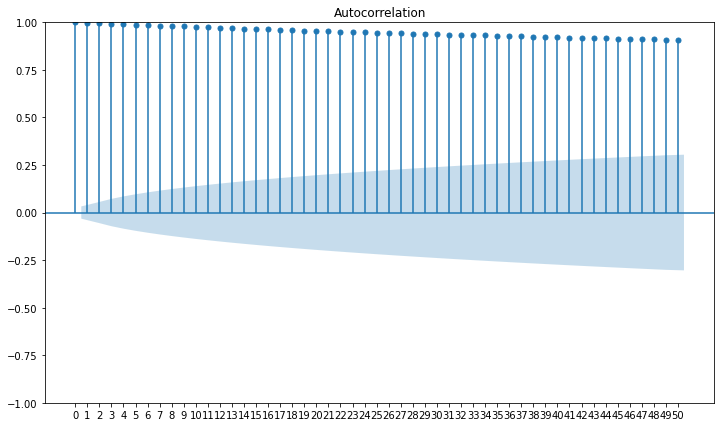

In [13]:
fig, ax = plt.subplots(figsize=(12,7))
plot_acf(gold['Close'], lags=50,ax=ax,title='Autocorrelation', use_vlines=True);
lags = list(range(51))
ax.set_xticks(lags);
ax.set_xticklabels(lags);

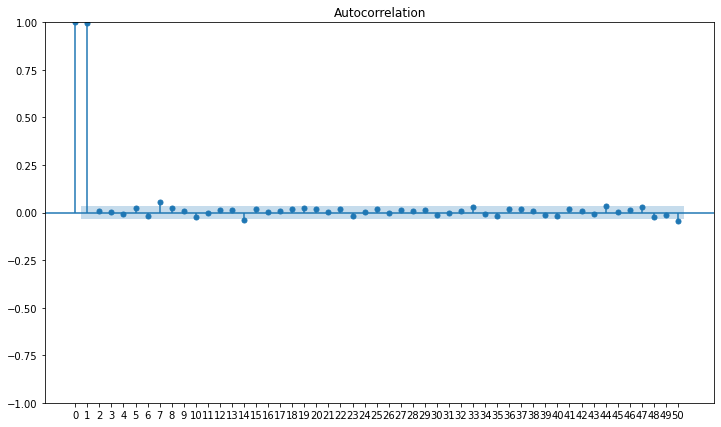

In [14]:
fig, ax = plt.subplots(figsize=(12,7))
plot_pacf(gold['Close'], lags=50,ax=ax,title='Autocorrelation', use_vlines=True);
lags = list(range(51))
ax.set_xticks(lags);
ax.set_xticklabels(lags);

In [15]:
gold_diff=gold['Close'].diff().dropna()
gold_diff.head(200)

Date
2008-01-02    2.968
2008-01-03    1.227
2008-01-04   -0.458
2008-01-07   -0.500
2008-01-08    2.469
              ...  
2008-10-01    0.853
2008-10-02   -5.642
2008-10-03   -1.456
2008-10-06    4.329
2008-10-07    2.073
Name: Close, Length: 200, dtype: float64

In [16]:
stationarity2 = adfuller(gold_diff)
print('ADF Statistic: %f' % stationarity2[0])
print('p-value: %f' % stationarity2[1])
print('Critical Values:')
for key, value in stationarity2[4].items():
 print('\t%s: %.3f' % (key, value))

ADF Statistic: -26.581070
p-value: 0.000000
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


<Axes: title={'center': 'First Difference Closing Gold Prices from 2008 to 2022'}, xlabel='Date', ylabel=' Transformed Closing Prices'>

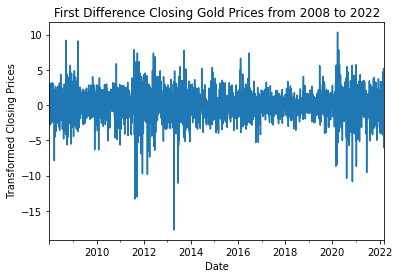

In [17]:
gold_diff.plot(ylabel=" Transformed Closing Prices",title="First Difference Closing Gold Prices from 2008 to 2022")

3392
313


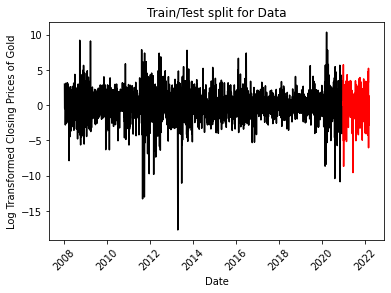

In [18]:
train = gold_diff[gold_diff.index < pd.to_datetime("01-01-2021", format='%d-%m-%Y')]
test = gold_diff[gold_diff.index > pd.to_datetime("31-12-2020", format='%d-%m-%Y')]
print(len(train))
print(len(test))

plt.plot(train, color = "black")
plt.plot(test, color = "red")
plt.ylabel('Log Transformed Closing Prices of Gold')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for Data")
plt.show()

(-0.25, 0.25)

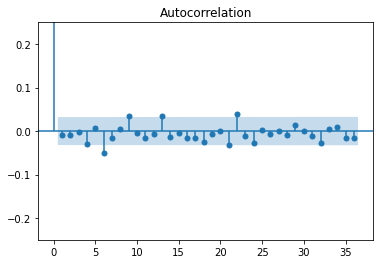

In [19]:
plot_acf(gold_diff.values)
plt.ylim([-0.25,0.25])

(-0.25, 0.25)

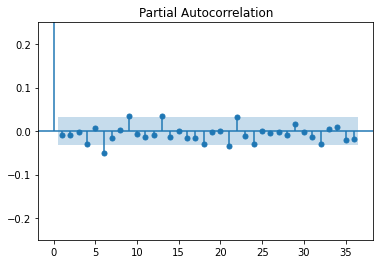

In [20]:
plot_pacf(gold_diff.values)
plt.ylim([-0.25,0.25])

In [21]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


In [22]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(gold_diff, start_p = 0, start_q = 0)        
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 3705
Model:               SARIMAX(2, 0, 2)   Log Likelihood               -7531.997
Date:                Sun, 18 Jun 2023   AIC                          15073.994
Time:                        23:01:46   BIC                          15105.081
Sample:                    01-02-2008   HQIC                         15085.057
                         - 03-15-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0270      0.075      0.361      0.718      -0.120       0.174
ar.L2          0.8481      0.073     11.610      0.000       0.705       0.991
ma.L1         -0.0262      0.070     -0.373      0.709      -0.164       0.111
ma.L2         -0.8750      0.069    -12.734      0.000      -1.010      -0.740
sigma2         3.4145      0.039     86.963      0.000       3.338       3.491
===================================================================================
Ljung-Box (L1) (Q):                   0.37   Jarque-Bera (JB):              8257.98
Prob(Q):                              0.54   Prob(JB):                         0.00
Heteroskedasticity (H):               0.66   Skew:                            -0.68
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [23]:
model = SARIMAX(train, order = (2, 0, 2))
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 3392
Model:               SARIMAX(2, 0, 2)   Log Likelihood               -6886.719
Date:                Sun, 18 Jun 2023   AIC                          13783.439
Time:                        23:01:47   BIC                          13814.085
Sample:                    01-02-2008   HQIC                         13794.393
                         - 12-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0044   1023.957  -4.29e-06      1.000   -2006.922    2006.914
ar.L2      -5.176e-05     35.585  -1.45e-06      1.000     -69.746      69.746
ma.L1         -0.0044   1023.956  -4.34e-06      1.000   -2006.922    2006.913
ma.L2         -0.0003     44.631  -6.57e-06      1.000     -87.475      87.474
sigma2         3.3963      0.041     83.219      0.000       3.316       3.476
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              8933.28
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.56   Skew:                            -0.69
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: xlabel='Date'>

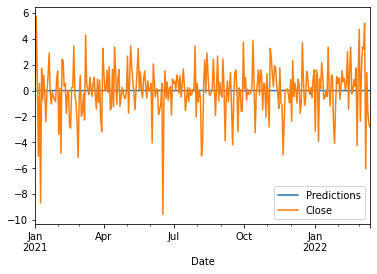

In [24]:
start = len(train)
end = len(train) + len(test) - 1
predictions = result.predict(start, end,typ = 'levels').rename("Predictions")
predictions.plot(legend = True)
test.plot(legend = True)

In [25]:
rmse(test, predictions)

1.9268462372754804

In [26]:
mean_squared_error(test, predictions)

3.712736422102677

<Axes: xlabel='Date'>

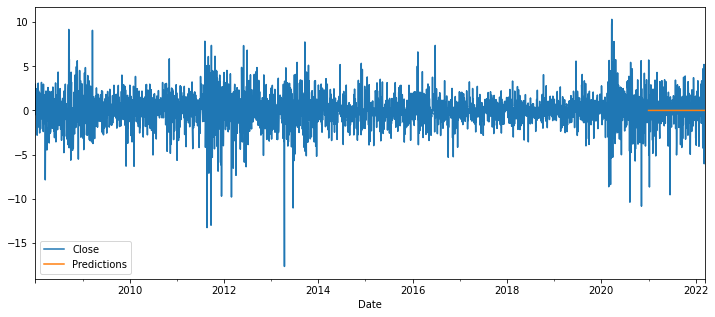

In [27]:
gold_diff.plot(figsize = (12, 5), legend = True)
predictions.plot(legend = True)

Date
2008-01-02    2.968000
2008-01-03    1.253228
2008-01-04   -0.446013
2008-01-07   -0.503565
2008-01-08    2.464410
                ...   
2020-12-25    0.005332
2020-12-28   -0.310679
2020-12-29    0.274854
2020-12-30    1.168035
2020-12-31    0.199110
Length: 3392, dtype: float64

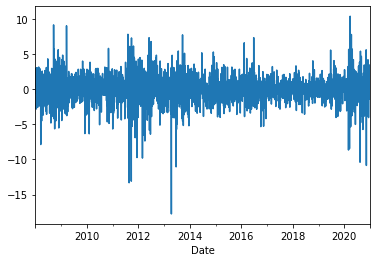

In [28]:
result.resid.plot()
result.resid

<Axes: xlabel='Date'>

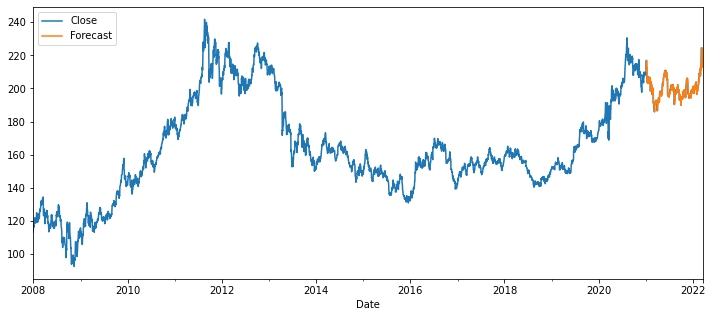

In [29]:
# Train the model on the full dataset
model= SARIMAX(gold['Close'], order = (2, 0, 2), )
result= model.fit()
forecast = result.predict(start = 3393, 
                          end = 3707, 
                          typ = 'levels').rename('Forecast')
  
# Plot the forecast values
gold['Close'].plot(figsize = (12, 5), legend = True)
forecast.plot(legend = True)